In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [13]:
accidentes_tipos = pd.read_csv('2017_accidents_tipus_gu_bcn_.csv')

In [14]:
accidentes_tipos.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,...,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,11,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,2.144821,41.366779
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,10,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.60,4588044.41,2.182588,41.439233
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,2,Febrer,7,15,Tarda,Col.lisió lateral,432116.48,4585382.72,2.186591,41.415280
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,11,Novembre,7,14,Tarda,Col.lisió fronto-lateral,431940.75,4585401.48,2.184483,41.415436
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,7,Juliol,27,14,Tarda,Abast,431537.32,4585363.11,2.179666,41.415060


In [22]:
corr = accidentes_tipos.corr()
accidentes_tipos.corr(numeric_only = True)

/tmp/ipykernel_4600/2391420547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = accidentes_tipos.corr()


,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
Codi_districte,1.000000,0.987637,0.159871,NaN,0.008895,-0.010874,-0.014116,0.440822,0.637332,0.011507,0.005310
Codi_barri,0.987637,1.000000,0.163730,NaN,0.011285,-0.012072,-0.014088,0.503770,0.611668,0.010855,0.005858
Codi_carrer,0.159871,0.163730,1.000000,NaN,0.059760,0.014360,-0.025352,0.088450,0.003130,-0.013342,0.005060
Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes_any,0.008895,0.011285,0.059760,NaN,1.000000,0.020487,-0.000820,0.025905,0.000643,0.003324,0.000141
Dia_mes,-0.010874,-0.012072,0.014360,NaN,0.020487,1.000000,0.012878,-0.018346,-0.007369,-0.003306,-0.013499
Hora_dia,-0.014116,-0.014088,-0.025352,NaN,-0.000820,0.012878,1.000000,-0.004796,0.013453,0.001704,0.018309
Coordenada_UTM_X,0.440822,0.503770,0.088450,NaN,0.025905,-0.018346,-0.004796,1.000000,0.408751,-0.003007,0.009063
Coordenada_UTM_Y,0.637332,0.611668,0.003130,NaN,0.000643,-0.007369,0.013453,0.408751,1.000000,0.009872,-0.003349
Longitud,0.011507,0.010855,-0.013342,NaN,0.003324,-0.003306,0.001704,-0.003007,0.009872,1.000000,-0.000282


In [23]:
mask = np.zeros_like(corr,dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)

<AxesSubplot:>

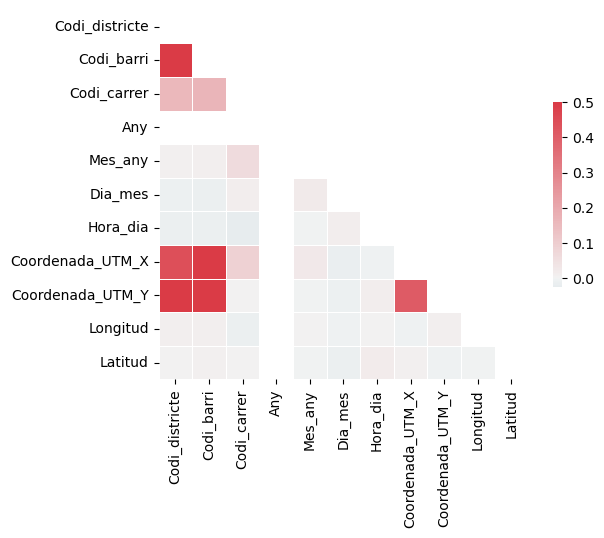

In [28]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax = .5, center = 0,
           square = True, linewidths = .7, cbar_kws={"shrink":.5})